<a href="https://colab.research.google.com/github/HoangNguyennnnnnn/MIPS/blob/main/fashion_mnist_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1, Chuẩn hóa hình ảnh

In [ ]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras import layers
print(f"Tensorflow:{tf.__version__}\nKeras:{keras.__version__}")

Tensorflow:2.15.0
Keras:2.15.0


In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


x_train:<class 'numpy.ndarray'>
y_train:<class 'numpy.ndarray'>
x_train:(60000, 28, 28)
y_train:(60000,)
Ankle Boot


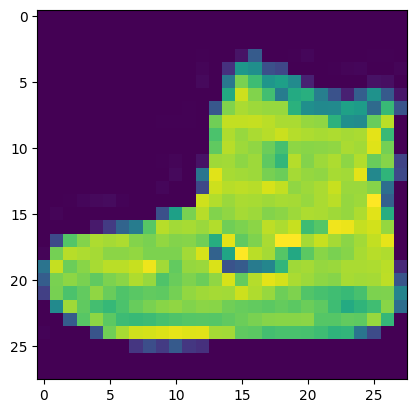

In [ ]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()
print(f"x_train:{type(x_train)}\ny_train:{type(y_train)}")
print(f"x_train:{x_train.shape}\ny_train:{y_train.shape}")
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]
class_nums = len(class_names)
print(f"{class_names[y_train[0]]}")
plt.imshow(x_train[0])

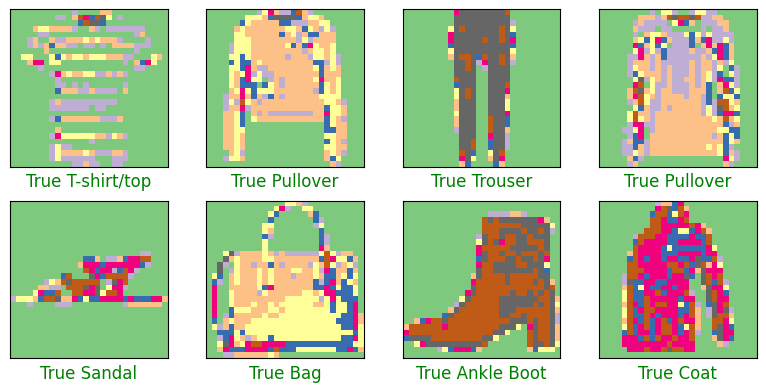

In [ ]:
from typing import Optional
def plot_data(x_data:np.ndarray,y_data:np.ndarray,y_proba :Optional[np.ndarray]=None) -> None:
  nrows,ncols = 2,4
  fig, axes = plt.subplots(nrows,ncols,figsize=(8,4))

  len_x = x_data.shape[0]
  for idx in range(nrows*ncols):
    ax = axes[idx // ncols, idx % ncols]
    img_idx = random.randint(0,len_x)
    ax.imshow(x_data[img_idx],cmap='Accent')
    ax.set(xticks=[],yticks=[])
    color = 'green'
    true_label_str = f"True {class_names[y_data[img_idx]]}"

    if y_proba is not None:
      predicted_idx = np.argmax(y_proba[img_idx])
      predicted_label = class_names[predicted_idx]
      color = 'red' if predicted_idx != y_data[img_idx] else color
      predicted_label_str = f"\nPredicted: {predicted_label}"

    img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
    ax.set_xlabel(img_title,color=color,fontsize=12)
  plt.tight_layout()
  plt.show()
plot_data(x_test,y_test)

In [ ]:
#Convert to N(0,1)
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255
#Make sure image have shape (60000,28,28) => (60000,28,28,1)
x_train = np.expand_dims(x_train,axis =-1)
x_test = np.expand_dims(x_test,axis =-1)
y_train_label = keras.utils.to_categorical(y_train,class_nums)
y_test_label = keras.utils.to_categorical(y_test,class_nums)

In [ ]:
print(f"{y_train_label}")

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

input_shape = (28,28,1)


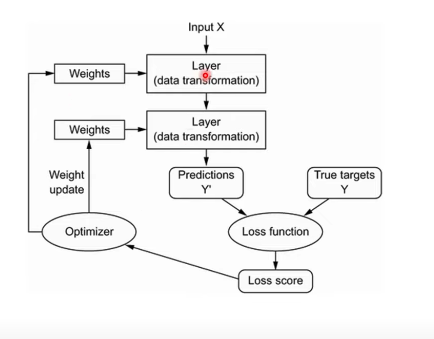

In [ ]:
from keras.api._v2.keras import activations
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape),  #(28,28,1) => (28*28) = (784)
    layers.Dense(512,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(class_nums,activation='softmax'),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


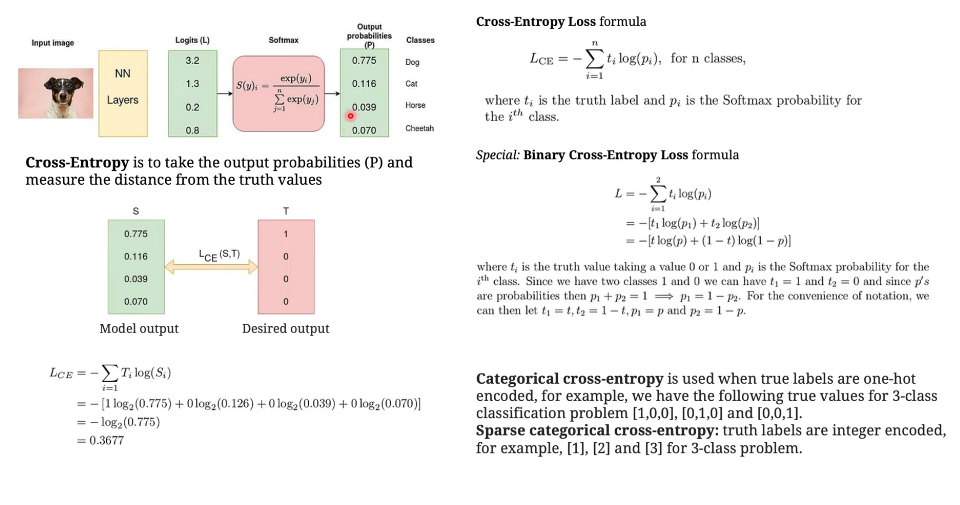

In [ ]:
model.compile(optimizer ='rmsprop',
                loss='categorical_crossentropy',
                metrics='accuracy')

In [ ]:
epochs = 10
batch_size = 256
history =  model.fit(x_train,y_train_label,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.1
          )

Epoch 1/10
211/211 [==============================] - 6s 22ms/step - loss: 0.6335 - accuracy: 0.7725 - val_loss: 0.5057 - val_accuracy: 0.8195
Epoch 2/10
211/211 [==============================] - 4s 17ms/step - loss: 0.4176 - accuracy: 0.8448 - val_loss: 0.3799 - val_accuracy: 0.8600
Epoch 3/10
211/211 [==============================] - 4s 17ms/step - loss: 0.3590 - accuracy: 0.8657 - val_loss: 0.3924 - val_accuracy: 0.8587
Epoch 4/10
211/211 [==============================] - 5s 23ms/step - loss: 0.3277 - accuracy: 0.8791 - val_loss: 0.3364 - val_accuracy: 0.8743
Epoch 5/10
211/211 [==============================] - 4s 17ms/step - loss: 0.3057 - accuracy: 0.8850 - val_loss: 0.4202 - val_accuracy: 0.8485
Epoch 6/10
211/211 [==============================] - 4s 17ms/step - loss: 0.2885 - accuracy: 0.8920 - val_loss: 0.3255 - val_accuracy: 0.8813
Epoch 7/10
211/211 [==============================] - 5s 23ms/step - loss: 0.2714 - accuracy: 0.8974 - val_loss: 0.3395 - val_accuracy: 0.8795

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
train_loss,val_loss = history_dict['loss'],history_dict['val_loss']
train_acc,val_acc = history_dict['accuracy'],history_dict['val_accuracy']

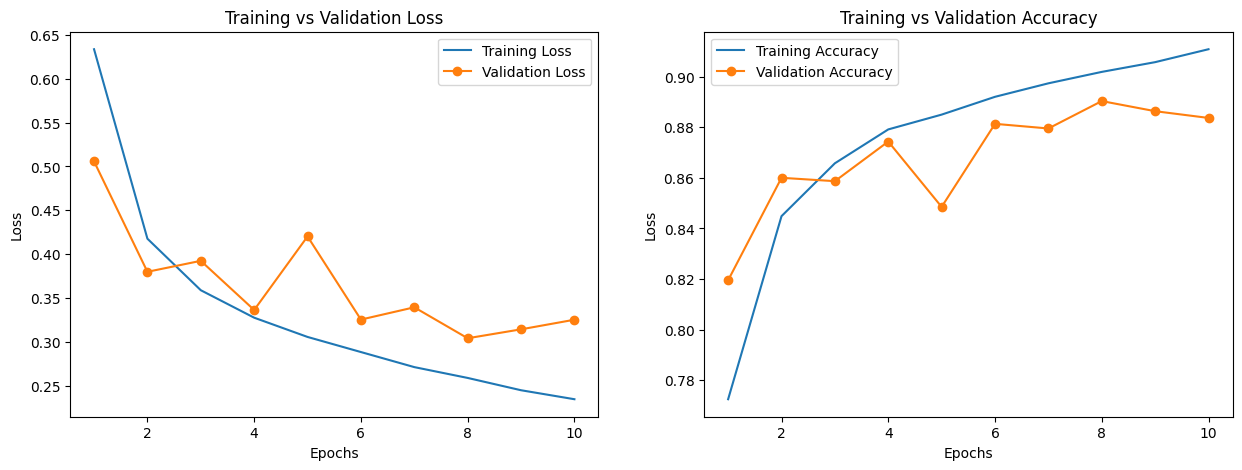

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs,train_loss,label="Training Loss")
ax1.plot(epoch_runs,val_loss,label="Validation Loss",marker='o')
ax1.set(title="Training vs Validation Loss",xlabel='Epochs',ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs,train_acc,label="Training Accuracy")
ax2.plot(epoch_runs,val_acc,label="Validation Accuracy",marker='o')
ax2.set(title="Training vs Validation Accuracy",xlabel='Epochs',ylabel='Loss')
ax2.legend()

plt.show()

Model Evaluation

In [ ]:
score = model.evaluate(x_test,y_test_label)

313/313 [==============================] - 2s 5ms/step - loss: 0.3371 - accuracy: 0.8796


In [ ]:
print(f"Test Loss: {score[0]:.4f}")
print(f"Test Accuracy: {score[1]:.4f}")

Test Loss: 0.3371
Test Accuracy: 0.8796


Prediction

In [ ]:
x_sample = x_test[:3]
y_proba = model.predict(x_sample)

1/1 [==============================] - 0s 267ms/step


In [ ]:
y_proba

array([[1.0826417e-07, 9.0353478e-07, 2.5250412e-07, 1.0593854e-07,
        6.7716662e-08, 7.0049064e-05, 1.3053357e-06, 8.6032046e-04,
        1.6243949e-07, 9.9906677e-01],
       [2.6760408e-05, 4.6409323e-13, 9.9973518e-01, 3.2692038e-10,
        1.8741547e-04, 1.3270194e-13, 5.0670824e-05, 1.0749642e-14,
        2.4243437e-12, 3.3273823e-13],
       [9.8519776e-11, 1.0000000e+00, 1.1351386e-15, 2.9596875e-10,
        1.8201067e-13, 3.3149273e-17, 1.0088352e-12, 9.3445841e-18,
        7.5796166e-16, 3.5700565e-18]], dtype=float32)

In [ ]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.999],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
predictions = np.argmax(y_proba,axis=1)

In [ ]:
[class_names[pred] for pred in predictions]

['Ankle Boot', 'Pullover', 'Trouser']

In [ ]:
y_proba = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


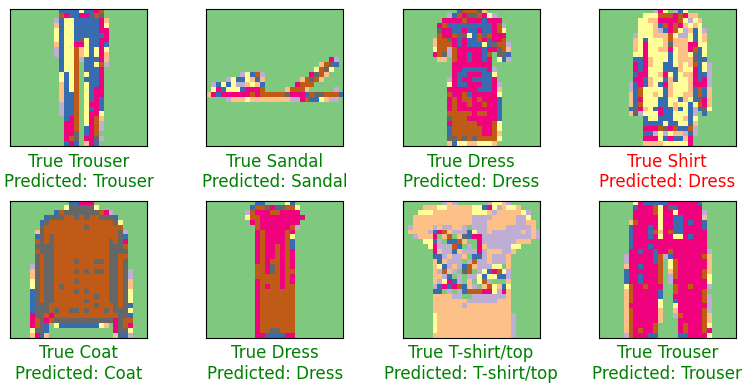

In [ ]:
plot_data(x_test,y_test,y_proba)